In [43]:
tweet = 'labeled_data.csv'

In [119]:
from tqdm import tqdm

In [122]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\josep\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle

In [45]:
!pip install nltk -U


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\josep\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot

In [49]:

import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [50]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
tweet_data = pd.read_csv(tweet)

In [52]:
tweet_data['label'] = np.where((tweet_data['class'] == 0) | (tweet_data['class'] == 1), 0, 1)

In [53]:
# tweet_data.rename(columns = {'class':'label'}, inplace = True)


In [54]:
tweet_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0


In [55]:
tweet_data['label'].value_counts()

label
0    20620
1     4163
Name: count, dtype: int64

In [57]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text




In [58]:
tweet_data['tweet'] = tweet_data['tweet'].apply(preprocess_text)

In [59]:
tweet_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,rt mayasolovely woman complain clean house amp...,1
1,1,3,0,3,0,1,rt mleew boy dat cold tyga dwn bad cuffin dat ...,0
2,2,3,0,3,0,1,rt urkindofbrand dawg rt sbaby life ever fuck ...,0
3,3,3,0,2,1,1,rt c g anderson viva base look like tranny,0
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,0
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,muthaf lie lifeasking pearl corey emanuel righ...,0
24779,25292,3,0,1,2,2,go break wrong heart baby drive redneck crazy,1
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...,0
24781,25295,6,0,6,0,1,youu get wild bitch tellin lie,0


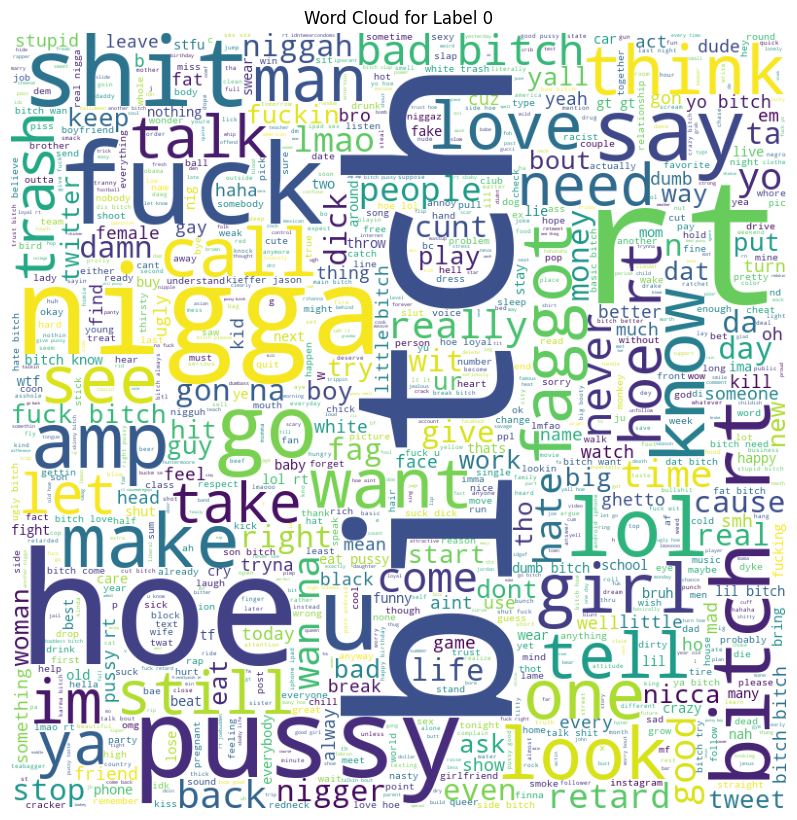

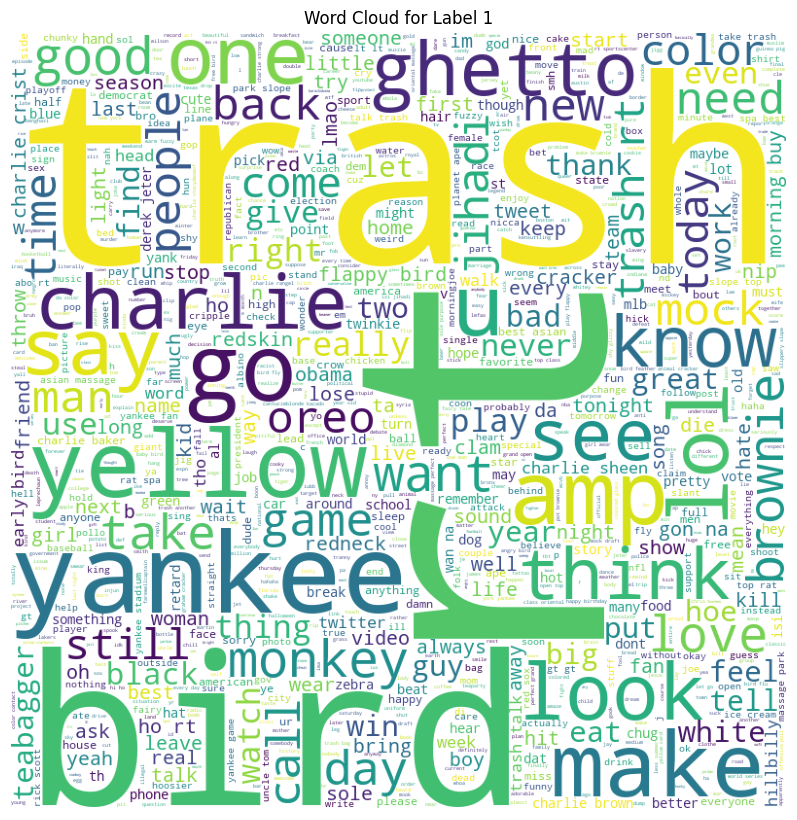

In [60]:

text_label_0 = ' '.join(tweet_data[tweet_data['label'] == 0]['tweet'].values)

# Combine all cleaned tweets for label 1 into a single string
text_label_1 = ' '.join(tweet_data[tweet_data['label'] == 1]['tweet'].values)


# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Label 0')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Label 1')
plt.tight_layout(pad=0)
plt.show()

In [61]:
X_train = tweet_data['tweet']
y_train = tweet_data['label']

In [62]:
X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [63]:
tfidf_vectorizer = TfidfVectorizer()

In [64]:
X_tfidf = tfidf_vectorizer.fit_transform(X_tr)

In [65]:
X_test_tf = tfidf_vectorizer.transform(X_test)

In [66]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_tfidf, y_tr)

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  w

In [67]:
X_train_resampled.shape

(32996, 24679)

In [68]:
def evaluate_model(model, X_test, y_test, model_name, evaluation_dict):
    # Generate predictions
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store evaluation metrics in the dictionary
    evaluation_dict[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'roc_auc': roc_auc,
        'classification_report': report,
        'confusion_matrix': cm
    }

    # Print classification report
    print("Classification Report for", model_name)
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for ' + model_name)
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + model_name)
    plt.legend(loc="lower right")
    plt.show()









In [69]:
evaluation_dict = {}

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4122
           1       0.81      0.89      0.85       835

    accuracy                           0.95      4957
   macro avg       0.90      0.93      0.91      4957
weighted avg       0.95      0.95      0.95      4957



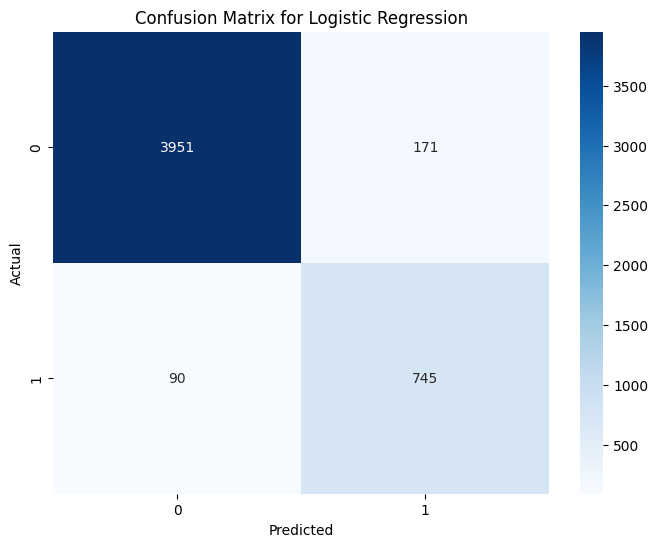

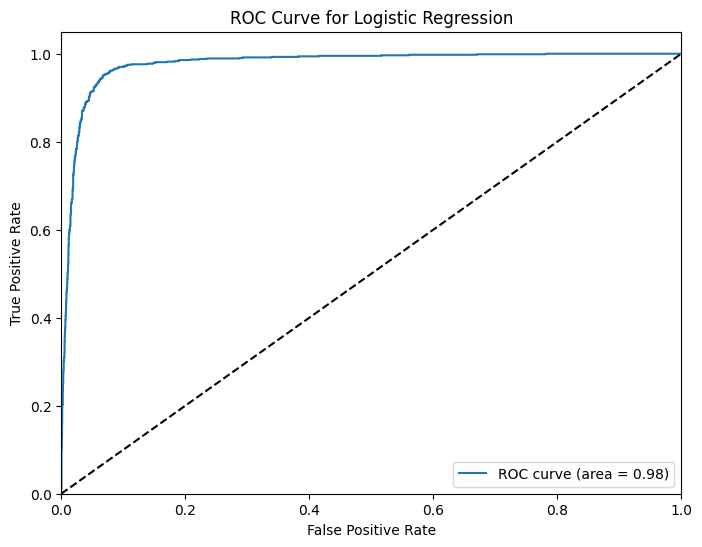

Best Parameters: {'C': 10}
Best Score: 0.9762396552278352


In [70]:
logistic = LogisticRegression(random_state=42)

# Define hyperparameters to tune
parameters = {
    'C': [0.1, 1, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
evaluate_model(grid_search.best_estimator_, X_test_tf, y_test,'Logistic Regression', evaluation_dict)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Save the best model
best_model = grid_search.best_estimator_
filename = 'logistic1.pkl'
pickle.dump(logistic, open(filename, 'wb'))

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4122
           1       0.86      0.83      0.84       835

    accuracy                           0.95      4957
   macro avg       0.91      0.90      0.91      4957
weighted avg       0.95      0.95      0.95      4957



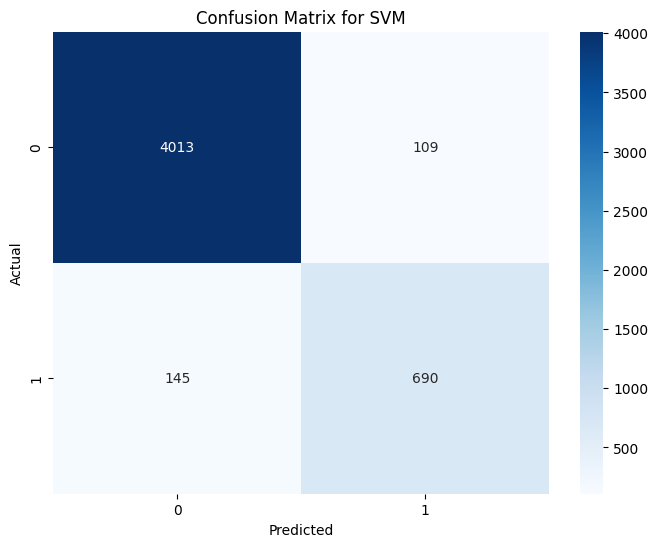

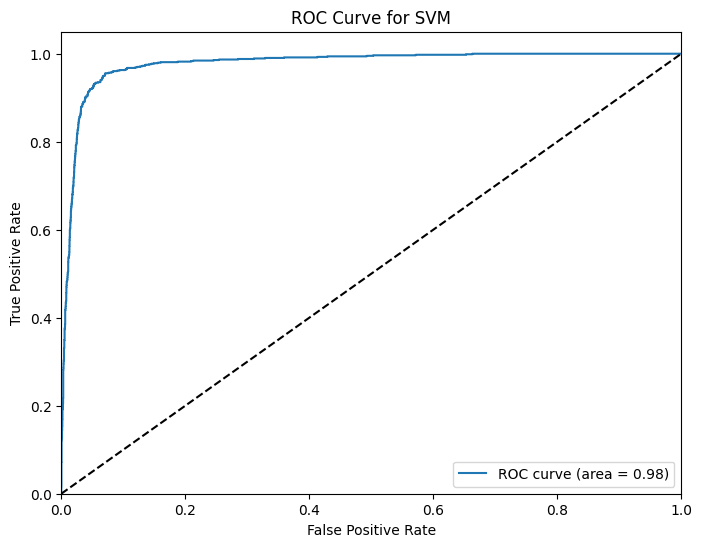

In [71]:
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train_resampled, y_train_resampled)

filename = 'svm.pkl'
pickle.dump(svm, open(filename, 'wb'))

# Evaluate the model
evaluate_model(svm,X_test_tf, y_test, 'SVM', evaluation_dict)

Best Parameters: {'alpha': 0.1}
Best Score: 0.9600863813158099
Classification Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4122
           1       0.67      0.70      0.68       835

    accuracy                           0.89      4957
   macro avg       0.80      0.82      0.81      4957
weighted avg       0.89      0.89      0.89      4957



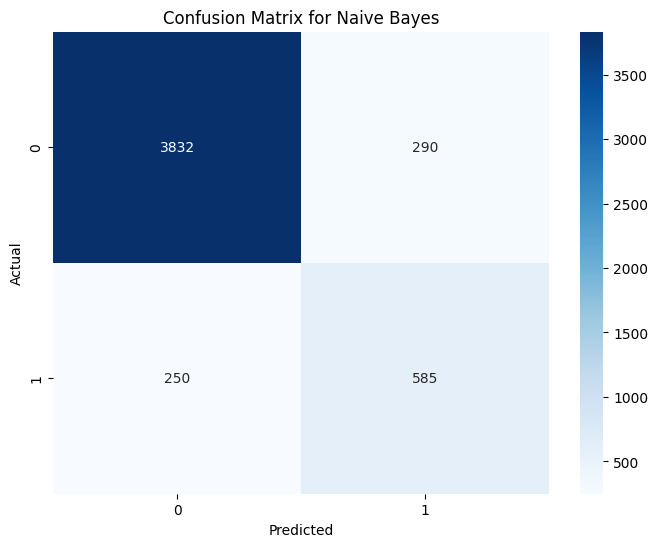

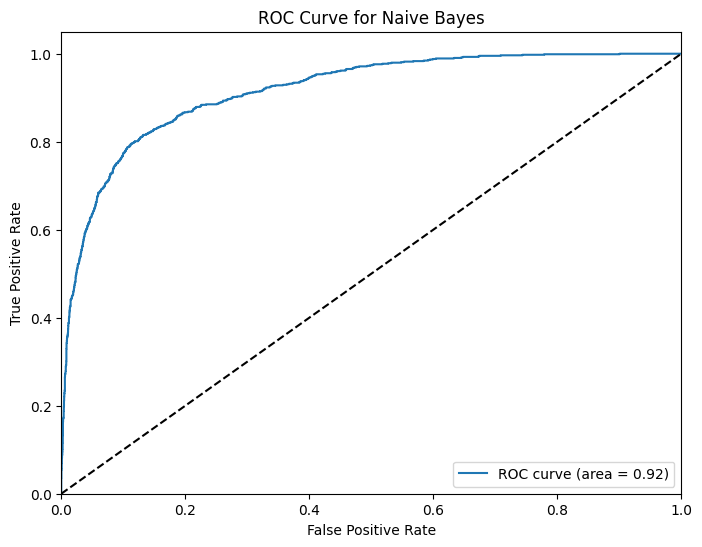

In [72]:
naive_bayes = MultinomialNB()

# Define hyperparameters to tune
parameters = {
    'alpha': [0.1, 0.5, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(naive_bayes, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
# Save the best model
filename = 'naive_bayes.pkl'
pickle.dump(best_model, open(filename, 'wb'))

# Evaluate the best model
evaluate_model(best_model, X_test_tf, y_test, 'Naive Bayes', evaluation_dict)

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4122
           1       0.85      0.80      0.82       835

    accuracy                           0.94      4957
   macro avg       0.91      0.88      0.90      4957
weighted avg       0.94      0.94      0.94      4957



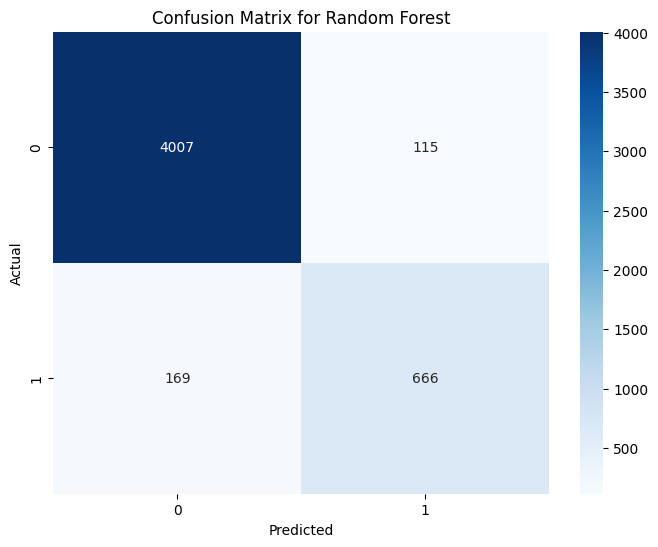

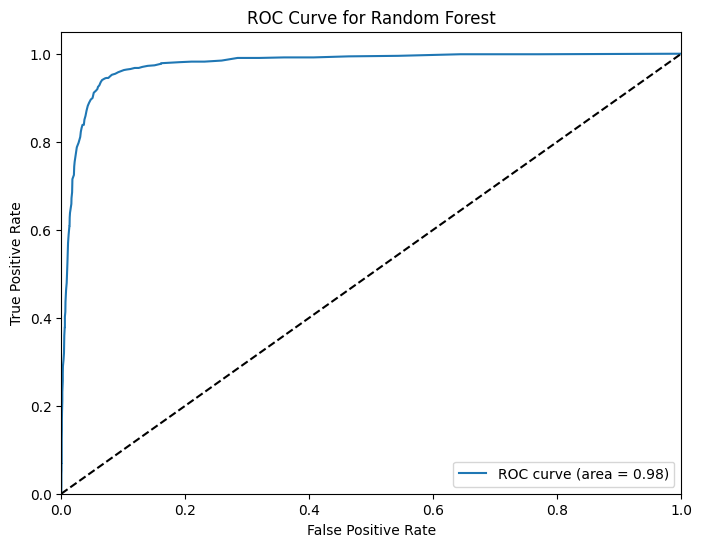

In [73]:
random_forest = RandomForestClassifier(random_state=42)


random_forest.fit(X_train_resampled, y_train_resampled)


filename = 'random_forest.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

# Evaluate the best model
evaluate_model(random_forest, X_test_tf, y_test, 'Random Forest', evaluation_dict)

In [74]:
evaluation_dict

{'Logistic Regression': {'accuracy': 0.9473471857978616,
  'precision': 0.8133187772925764,
  'recall': 0.8922155688622755,
  'roc_auc': 0.9774246267290748,
  'classification_report': {'0': {'precision': 0.977728285077951,
    'recall': 0.9585152838427947,
    'f1-score': 0.9680264608599779,
    'support': 4122.0},
   '1': {'precision': 0.8133187772925764,
    'recall': 0.8922155688622755,
    'f1-score': 0.8509423186750429,
    'support': 835.0},
   'accuracy': 0.9473471857978616,
   'macro avg': {'precision': 0.8955235311852636,
    'recall': 0.925365426352535,
    'f1-score': 0.9094843897675104,
    'support': 4957.0},
   'weighted avg': {'precision': 0.9500337240529786,
    'recall': 0.9473471857978616,
    'f1-score': 0.9483037941816603,
    'support': 4957.0}},
  'confusion_matrix': array([[3951,  171],
         [  90,  745]], dtype=int64)},
 'SVM': {'accuracy': 0.9487593302400645,
  'precision': 0.8635794743429287,
  'recall': 0.8263473053892215,
  'roc_auc': 0.97685633100611,
 

Classification Report for Ensemble (RF + SVM + LR)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4122
           1       0.85      0.85      0.85       835

    accuracy                           0.95      4957
   macro avg       0.91      0.91      0.91      4957
weighted avg       0.95      0.95      0.95      4957



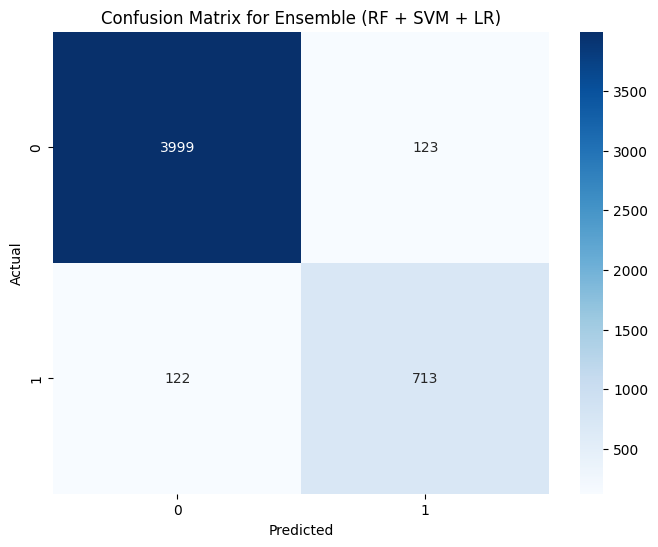

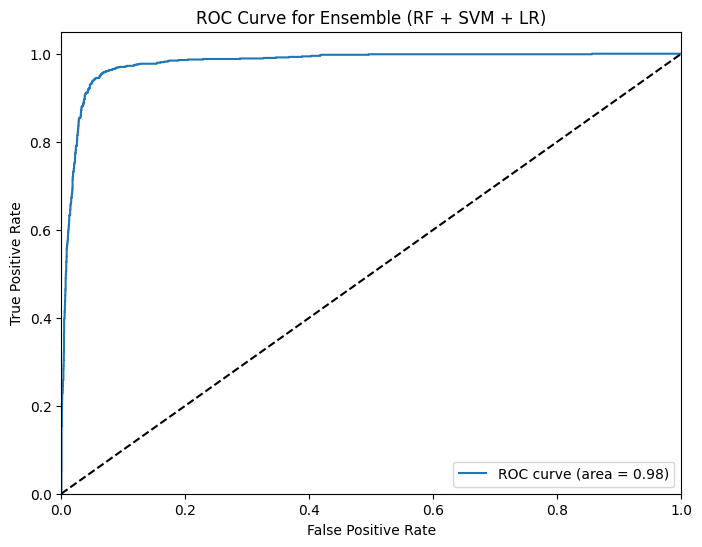

In [75]:
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
lr = LogisticRegression(random_state=42)

# Create the ensemble model
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('lr', lr)
], voting='soft')  # Use 'soft' voting for probabilities

# Train the ensemble model
ensemble.fit(X_train_resampled, y_train_resampled)

# Save the ensemble model
filename = 'ensemble1.pkl'
pickle.dump(ensemble, open(filename, 'wb'))

# Evaluate the ensemble model
evaluate_model(ensemble, X_test_tf, y_test, 'Ensemble (RF + SVM + LR)', evaluation_dict)

In [76]:
tweet_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,rt mayasolovely woman complain clean house amp...,1
1,1,3,0,3,0,1,rt mleew boy dat cold tyga dwn bad cuffin dat ...,0
2,2,3,0,3,0,1,rt urkindofbrand dawg rt sbaby life ever fuck ...,0
3,3,3,0,2,1,1,rt c g anderson viva base look like tranny,0
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,0
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,muthaf lie lifeasking pearl corey emanuel righ...,0
24779,25292,3,0,1,2,2,go break wrong heart baby drive redneck crazy,1
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...,0
24781,25295,6,0,6,0,1,youu get wild bitch tellin lie,0


In [77]:
X = tweet_data['tweet']
y = tweet_data['label']

In [78]:
voc_size=5000

In [79]:
onehot_repr = [one_hot(words,voc_size)for words in X]

In [80]:
onehot_repr

[[3793, 561, 2202, 2295, 1617, 380, 313, 4945, 4137, 4873, 4435],
 [3793, 3784, 699, 3653, 2017, 2807, 1181, 3040, 257, 3653, 688, 3016, 3249],
 [3793, 4757, 920, 3793, 4870, 1365, 507, 2706, 709, 715, 2724, 4038, 1432],
 [3793, 1235, 2354, 4273, 147, 1959, 408, 1827, 4278],
 [3793, 3867, 1432, 3683, 1449, 3994, 1449, 4623, 709, 3073, 669],
 [4356, 1542, 1432, 1215, 2676, 612, 581, 3628, 2706, 688],
 [3440, 2161, 3269, 1200, 709, 148, 1455, 1432, 4696],
 [1990, 1759, 2911, 631, 709, 3266, 4526, 1064, 2738],
 [313, 1449, 148, 669, 709, 2662, 313, 2465],
 [324, 1679, 993, 2660, 1308, 709],
 [3885, 709, 1042, 1614, 3325, 2849, 4767, 1827, 1139],
 [4290, 2541, 709, 2541, 3106],
 [688, 839, 1469, 4449, 4696, 1809],
 [3040, 709, 2450, 1827],
 [709, 148],
 [709, 452, 1136],
 [709, 387, 4671],
 [709, 2707],
 [709, 148, 1095, 344, 3171],
 [1148, 1563, 313, 3040, 709],
 [4315, 709, 2224, 3073, 4527],
 [372, 709, 1827, 4111],
 [2224, 1422, 688, 378, 145],
 [2706, 709, 1863, 1207, 784, 3764, 180, 

In [82]:
embedded_doc = pad_sequences(onehot_repr,padding='pre',maxlen=30)
print(embedded_doc)

[[   0    0    0 ... 4137 4873 4435]
 [   0    0    0 ...  688 3016 3249]
 [   0    0    0 ... 2724 4038 1432]
 ...
 [   0    0    0 ... 4631  483 1714]
 [   0    0    0 ...  709 4965 4684]
 [   0    0    0 ...  313 1946 1299]]


In [83]:
embedded_doc[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 3793, 3784,  699, 3653, 2017,
       2807, 1181, 3040,  257, 3653,  688, 3016, 3249])

In [84]:
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X_train1)

# X_train_seq = tokenizer.texts_to_sequences(X_train1)
# X_test_seq = tokenizer.texts_to_sequences(X_test1)

In [85]:
from keras.callbacks import ModelCheckpoint

In [86]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [88]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [89]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.add(LSTM(100, input_shape=(30, embedding_vector_features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 40)          200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [90]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [91]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [92]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [93]:
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=10, batch_size=64, callbacks=[checkpoint])

Epoch 1/10


309/310 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.8975
Epoch 1: val_accuracy improved from -inf to 0.94190, saving model to best_model.keras
310/310 [==============================] - 20s 47ms/step - loss: 0.2496 - accuracy: 0.8977 - val_loss: 0.1462 - val_accuracy: 0.9419
Epoch 2/10
310/310 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9632
Epoch 2: val_accuracy did not improve from 0.94190
310/310 [==============================] - 13s 43ms/step - loss: 0.1017 - accuracy: 0.9632 - val_loss: 0.1613 - val_accuracy: 0.9409
Epoch 3/10
308/310 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9761
Epoch 3: val_accuracy did not improve from 0.94190
310/310 [==============================] - 12s 39ms/step - loss: 0.0739 - accuracy: 0.9760 - val_loss: 0.1890 - val_accuracy: 0.9330
Epoch 4/10
309/310 [============================>.] - ETA: 0s - loss: 0.0554 - accuracy: 0.9825
Epoch 4: val_accuracy did n

In [94]:
from keras.models import load_model

In [95]:
best_model = load_model('best_model.keras')

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test1, y_test1)
print(f'Best Model Accuracy: {accuracy}')

# Get predictions
y_pred_prob = best_model.predict(X_test1)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Create and save confusion matrix
cm = confusion_matrix(y_test1, y_pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
print("Confusion Matrix:\n", cm)

155/155 [==============================] - 2s 6ms/step - loss: 0.1462 - accuracy: 0.9419
Best Model Accuracy: 0.941900372505188
155/155 [==============================] - 2s 6ms/step
Confusion Matrix:
 [[3938  184]
 [ 104  731]]


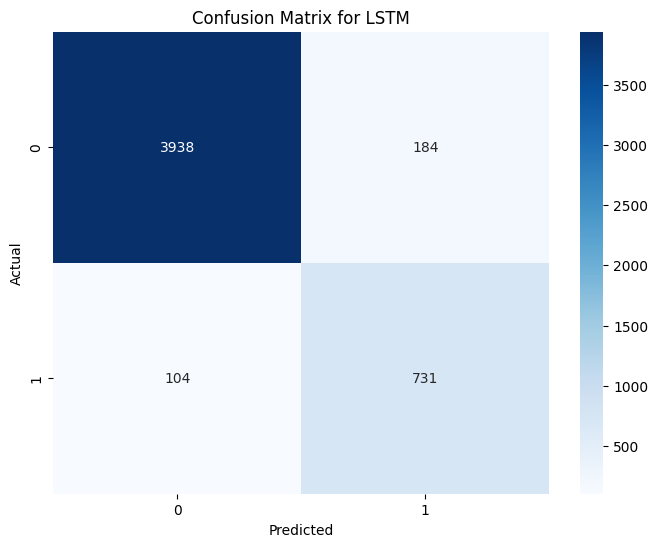

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ' + 'LSTM')
plt.show()

In [97]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_val,X_test2,y_val,y_test2 = train_test_split(X_test1,y_test1,test_size=0.5,random_state=42)

In [99]:
max_words = 5000
maxlen = 40
embedding_dim = 100

In [100]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train1)
tokenizer_filename = 'tokenizer.pkl'
with open(tokenizer_filename, 'wb') as file:
    pickle.dump(tokenizer, file)
X_train_seq = tokenizer.texts_to_sequences(X_train1)
X_valid_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test2)

In [101]:
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_valid_pad = pad_sequences(X_valid_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [102]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [103]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the best model
checkpoint = ModelCheckpoint('best_model1.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(X_train_pad, y_train1, validation_data=(X_valid_pad, y_val), epochs=10, batch_size=32, callbacks=[checkpoint])


Epoch 1/10
619/620 [============================>.] - ETA: 0s - loss: 0.1635 - accuracy: 0.9348
Epoch 1: val_accuracy improved from -inf to 0.96207, saving model to best_model1.keras
620/620 [==============================] - 7s 9ms/step - loss: 0.1634 - accuracy: 0.9349 - val_loss: 0.1129 - val_accuracy: 0.9621
Epoch 2/10
614/620 [============================>.] - ETA: 0s - loss: 0.0760 - accuracy: 0.9717
Epoch 2: val_accuracy did not improve from 0.96207
620/620 [==============================] - 5s 9ms/step - loss: 0.0760 - accuracy: 0.9717 - val_loss: 0.1308 - val_accuracy: 0.9560
Epoch 3/10
617/620 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.9857
Epoch 3: val_accuracy did not improve from 0.96207
620/620 [==============================] - 5s 9ms/step - loss: 0.0405 - accuracy: 0.9858 - val_loss: 0.1640 - val_accuracy: 0.9520
Epoch 4/10
619/620 [============================>.] - ETA: 0s - loss: 0.0208 - accuracy: 0.9928
Epoch 4: val_accuracy did not impr

78/78 [==============================] - 1s 3ms/step - loss: 0.1210 - accuracy: 0.9508
Best Model Accuracy: 0.9507865905761719
78/78 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[1988   69]
 [  53  369]]


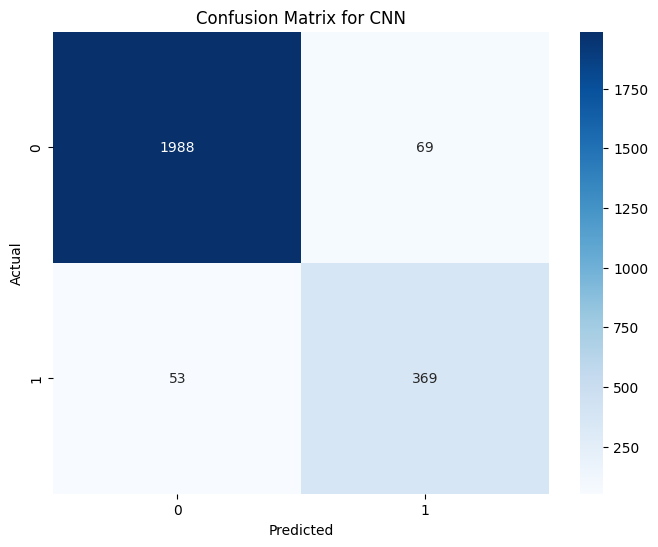

In [104]:
best_model1 = load_model('best_model1.keras')

# Plot classification report
loss, accuracy = best_model1.evaluate(X_test_pad, y_test2)
print(f'Best Model Accuracy: {accuracy}')

# Get predictions
y_pred_prob = best_model1.predict(X_test_pad)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Create and save confusion matrix
cm = confusion_matrix(y_test2, y_pred)
# np.savetxt("confusion_matrix.csv", cm, delimiter=",")
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ' + 'CNN')
plt.show()

In [ ]:
### We may conclude that CNN is performing best